# データシステムの知能化とデザイン
# 第5回課題
## 学籍番号：62116674
## 氏名：藤本巧実

## 課題

前準備

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

学習データの準備

In [80]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

In [81]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

データの整理

In [82]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


ラベル2のデータの排除

※ちょうど0~130列が0と1のため下のコードによる方法を採っているが，汎用性は低い．

In [83]:
wine_data2 = wine.data[0:130]
wine_target2 = wine.target[0:130]

正解ラベルのcolumnsをclassとして追加

In [84]:
wine_cat = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),
                      pd.DataFrame(wine.target, columns=['class'])], axis=1)
wine_cat.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


クラス2のデータの削除

In [85]:
wine_cat[wine_cat['class']==2].index

Int64Index([130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
            156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
            169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64')

In [86]:
wine_cat.drop(wine_cat[wine_cat['class'] == 2].index, inplace=True)

In [87]:
wine_data = wine_cat.values[:,:13]
wine_target = wine_cat.values[:,13]
print(wine_data, len(wine_data))
print(wine_target, len(wine_target))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.179e+01 2.130e+00 2.780e+00 ... 9.700e-01 2.440e+00 4.660e+02]
 [1.237e+01 1.630e+00 2.300e+00 ... 8.900e-01 2.780e+00 3.420e+02]
 [1.204e+01 4.300e+00 2.380e+00 ... 7.900e-01 2.570e+00 5.800e+02]] 130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 130


データセットの分割

In [88]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(wine_data, wine_target, test_size=0.25)

In [89]:
Train_X.shape, Test_X.shape

((97, 13), (33, 13))

PyTorchテンソルへの変換と訓練データセット作成

In [90]:
train_X = torch.FloatTensor(Train_X)
train_Y = torch.LongTensor(Train_Y)
test_X = torch.FloatTensor(Test_X)
test_Y = torch.LongTensor(Test_Y)

In [91]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

(torch.Size([97, 13]),
 torch.Size([33, 13]),
 torch.Size([97]),
 torch.Size([33]))

In [92]:
train = TensorDataset(train_X, train_Y)

In [93]:
train[0], len(train)

((tensor([1.2470e+01, 1.5200e+00, 2.2000e+00, 1.9000e+01, 1.6200e+02, 2.5000e+00,
          2.2700e+00, 3.2000e-01, 3.2800e+00, 2.6000e+00, 1.1600e+00, 2.6300e+00,
          9.3700e+02]),
  tensor(1)),
 97)

データローダの構築

In [94]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

### ［改良1］lrを1/10倍する(0.01→0.001)←なんとなく

モデルの定義

In [95]:
class Net(nn.Module):
  def __init__(self): #(1)
    super(Net, self).__init__() #(2)
    self.fc1 = nn.Linear(13, 128) #(3)
    self.fc2 = nn.Linear(128, 2) #(4)
  def forward(self, x): #(5)
    x = F.relu(self.fc1(x)) #(6)
    x = self.fc2(x) #(7)
    return x #(8)

In [96]:
model = Net()

In [97]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

学習の実行

In [98]:
for epoch in range(500):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
  if(epoch+1)%10 == 0: #(9)
    print(epoch+1, total_loss)

10 tensor(1.6842)
20 tensor(1.3832)
30 tensor(1.6943)
40 tensor(1.3102)
50 tensor(1.4195)
60 tensor(1.1555)
70 tensor(1.3105)
80 tensor(1.3757)
90 tensor(1.4727)
100 tensor(1.1675)
110 tensor(1.5421)
120 tensor(1.1043)
130 tensor(1.3143)
140 tensor(1.2841)
150 tensor(1.2702)
160 tensor(1.2793)
170 tensor(1.0168)
180 tensor(1.3063)
190 tensor(1.2187)
200 tensor(1.0611)
210 tensor(1.9389)
220 tensor(1.5308)
230 tensor(1.3450)
240 tensor(1.2644)
250 tensor(1.3351)
260 tensor(1.3145)
270 tensor(1.2734)
280 tensor(1.4326)
290 tensor(1.2723)
300 tensor(1.2067)
310 tensor(2.9025)
320 tensor(1.6019)
330 tensor(1.2499)
340 tensor(1.5008)
350 tensor(1.7133)
360 tensor(1.0940)
370 tensor(1.2572)
380 tensor(2.3729)
390 tensor(1.1080)
400 tensor(1.3610)
410 tensor(1.9144)
420 tensor(1.2016)
430 tensor(1.0523)
440 tensor(1.9320)
450 tensor(1.3288)
460 tensor(1.6581)
470 tensor(1.4171)
480 tensor(1.1102)
490 tensor(1.3681)
500 tensor(1.2944)


精度の計算

In [99]:
test_model = model(test_X).detach()

In [100]:
test_model

tensor([[13.3333,  1.8196],
        [-2.0252,  2.8454],
        [-0.6909,  1.7761],
        [-3.3367,  3.9335],
        [-0.2194,  1.2371],
        [18.0715,  2.2752],
        [-1.3922,  2.3873],
        [-3.5213,  3.9795],
        [-2.6558,  3.1854],
        [13.3628,  2.3973],
        [-2.1581,  2.7683],
        [-1.1988,  3.0791],
        [ 0.6281,  1.1714],
        [-0.0797,  1.9075],
        [11.1358,  2.3692],
        [-1.0978,  2.2349],
        [ 2.2889,  1.1599],
        [ 0.8055,  1.2324],
        [-1.2076,  2.5134],
        [ 7.0228,  1.6341],
        [ 2.1009,  1.3028],
        [ 2.6924,  1.0717],
        [-3.7812,  4.5669],
        [ 7.0472,  1.6023],
        [-2.0251,  2.7802],
        [ 2.1662,  1.0241],
        [-1.7454,  3.2013],
        [-1.2388,  2.3583],
        [10.2762,  1.8953],
        [ 1.1518,  1.8070],
        [-0.2222,  1.5659],
        [-3.2073,  4.4992],
        [15.0240,  2.1572]])

torch.maxで最大の抽出

In [101]:
torch.max(test_model, 1)

torch.return_types.max(
values=tensor([13.3333,  2.8454,  1.7761,  3.9335,  1.2371, 18.0715,  2.3873,  3.9795,
         3.1854, 13.3628,  2.7683,  3.0791,  1.1714,  1.9075, 11.1358,  2.2349,
         2.2889,  1.2324,  2.5134,  7.0228,  2.1009,  2.6924,  4.5669,  7.0472,
         2.7802,  2.1662,  3.2013,  2.3583, 10.2762,  1.8070,  1.5659,  4.4992,
        15.0240]),
indices=tensor([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0]))

In [102]:
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.9090909090909091

精度90%を超えることができた．しかし複数回実行すると90%を下回ることもあり，おおよそ75~100%の間であった．

## →では，学習率と正解率にはどのような関係があるのか？

In [103]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [104]:
lr_list = np.logspace(-10,0,num=10,base=10)

ac_num_list_s = np.zeros(len(lr_list))
for i in range(10):
  ac_score_list = []
  for lr in tqdm(lr_list):
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(500):
      total_loss = 0 #(1)
      for train_x, train_y in train_loader: #(2)
        optimizer.zero_grad() #(3)
        output = model(train_x) #(4)
        loss = criterion(output, train_y) #(5)
        loss.backward() #(6)
        optimizer.step() #(7)
        total_loss += loss.data #(8)
    test_model = model(test_X).detach()
    torch.max(test_model, 1)
    result = torch.max(test_model, 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
    ac_score_list.append(accuracy)
  ac_score_list = np.array(ac_score_list)
  ac_num_list_s = ac_num_list_s + ac_score_list
ac_num_list_s = ac_num_list_s/10

100%|██████████| 10/10 [00:28<00:00,  2.87s/it]


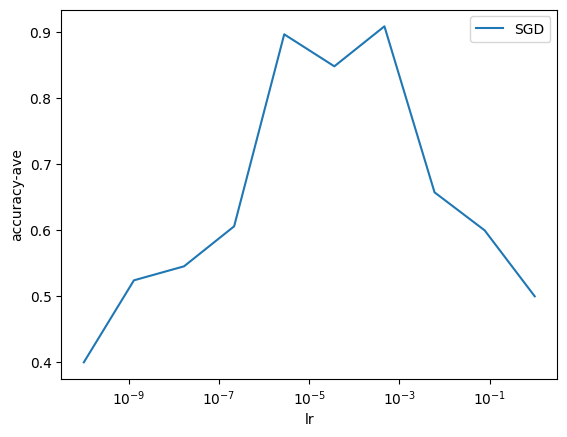

In [109]:
plt.plot(lr_list, ac_num_list_s,label='SGD')
plt.xlabel('lr')
plt.ylabel('accuracy-ave')
plt.xscale('log')
plt.legend()
plt.show()

おおよそlr=0.001~0.00001付近で高い正解率となることがわかった．

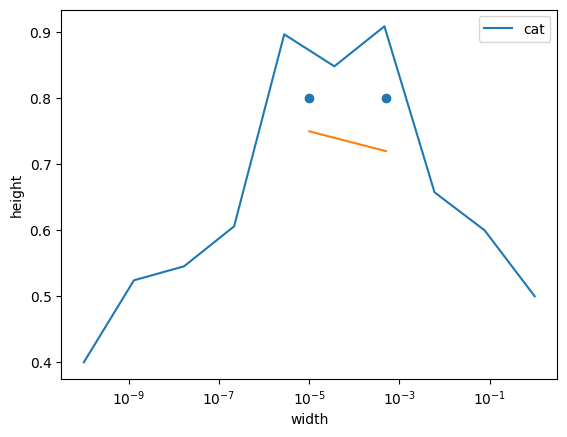

In [117]:
plt.plot(lr_list, ac_num_list_s,label='cat')
plt.scatter([10**-5,5*10**-4],[0.8,0.8])
plt.plot([10**-5,5*10**-4],[0.75,0.72])
plt.xlabel('width')
plt.ylabel('height')
plt.xscale('log')
plt.legend()
plt.show()

このように，不貞腐れた猫を表すこともできる．

### ［改良2］隠れ層を深くする（lrは元の0.01）

モデルの再定義

In [141]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x

In [134]:
model = Net()

In [135]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [136]:
for epoch in range(500):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
  if(epoch+1)%10 == 0: #(9)
    print(epoch+1, total_loss)

10 tensor(3.8822)
20 tensor(1.4367)
30 tensor(1.3204)
40 tensor(1.3279)
50 tensor(2.9675)
60 tensor(1.4284)
70 tensor(1.2894)
80 tensor(1.2054)
90 tensor(1.1916)
100 tensor(1.7040)
110 tensor(1.2032)
120 tensor(1.0759)
130 tensor(1.6598)
140 tensor(0.8898)
150 tensor(1.2889)
160 tensor(1.4614)
170 tensor(0.8797)
180 tensor(0.9745)
190 tensor(0.8823)
200 tensor(0.7006)
210 tensor(0.8546)
220 tensor(0.8541)
230 tensor(0.8323)
240 tensor(0.7356)
250 tensor(0.6240)
260 tensor(0.5434)
270 tensor(0.6120)
280 tensor(0.4254)
290 tensor(4.3892)
300 tensor(0.5591)
310 tensor(0.5917)
320 tensor(0.6071)
330 tensor(4.4037)
340 tensor(1.5278)
350 tensor(1.1267)
360 tensor(1.6184)
370 tensor(0.9568)
380 tensor(0.6658)
390 tensor(1.4448)
400 tensor(0.7135)
410 tensor(0.8593)
420 tensor(0.6011)
430 tensor(0.5626)
440 tensor(0.5114)
450 tensor(0.6342)
460 tensor(0.5178)
470 tensor(0.7569)
480 tensor(0.4097)
490 tensor(0.6732)
500 tensor(0.6120)


In [137]:
test_model = model(test_X).detach()

In [138]:
test_model

tensor([[ 5.7570, -6.2842],
        [-2.7657,  2.8431],
        [-2.3227,  2.3686],
        [-2.7657,  2.8431],
        [-1.9366,  1.9551],
        [ 9.0654, -9.8273],
        [-2.4833,  2.5407],
        [-2.6363,  2.6578],
        [-2.7657,  2.8431],
        [ 7.1607, -7.7875],
        [-2.7657,  2.8431],
        [-2.4032,  2.4549],
        [-1.1708,  1.1350],
        [-2.0566,  2.0837],
        [ 5.8078, -6.3386],
        [-2.6531,  2.7225],
        [ 0.6935, -0.8615],
        [-0.8654,  0.8080],
        [-2.7657,  2.8431],
        [ 3.1609, -3.5039],
        [ 0.4682, -0.6202],
        [ 2.2745, -2.5546],
        [-2.7654,  2.8437],
        [ 3.8176, -4.2072],
        [-2.7657,  2.8431],
        [ 1.4752, -1.6987],
        [-2.5787,  2.6428],
        [-2.4474,  2.5022],
        [ 4.5218, -4.9614],
        [-0.4226,  0.3337],
        [-2.2895,  2.3332],
        [-2.7657,  2.8431],
        [ 7.1023, -7.7250]])

In [139]:
torch.max(test_model, 1)

torch.return_types.max(
values=tensor([5.7570, 2.8431, 2.3686, 2.8431, 1.9551, 9.0654, 2.5407, 2.6578, 2.8431,
        7.1607, 2.8431, 2.4549, 1.1350, 2.0837, 5.8078, 2.7225, 0.6935, 0.8080,
        2.8431, 3.1609, 0.4682, 2.2745, 2.8437, 3.8176, 2.8431, 1.4752, 2.6428,
        2.5022, 4.5218, 0.3337, 2.3332, 2.8431, 7.1023]),
indices=tensor([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0]))

In [140]:
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.9090909090909091

こちらも精度90%を超えることができた．

### ［改良3］正解率1を目指す．

- 改良2のように隠れ層を深くした上で，学習率・学習方法を工夫することで正解率1を目指す．

- 今回は改良1で行った方法で正解率の高い学習率を探し，それをAdamとSDGで比較する．

In [142]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(13, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x

In [143]:
lr_list = np.logspace(-10,0,num=10,base=10)

ac_num_list_s = np.zeros(len(lr_list))
for i in range(10):
  ac_score_list = []
  for lr in tqdm(lr_list):
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(500):
      total_loss = 0 #(1)
      for train_x, train_y in train_loader: #(2)
        optimizer.zero_grad() #(3)
        output = model(train_x) #(4)
        loss = criterion(output, train_y) #(5)
        loss.backward() #(6)
        optimizer.step() #(7)
        total_loss += loss.data #(8)
    test_model = model(test_X).detach()
    torch.max(test_model, 1)
    result = torch.max(test_model, 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
    ac_score_list.append(accuracy)
  ac_score_list = np.array(ac_score_list)
  ac_num_list_s = ac_num_list_s + ac_score_list
ac_num_list_s = ac_num_list_s/10



ac_num_list_a = np.zeros(len(lr_list))
for i in range(10):
  ac_score_list = []
  for lr in tqdm(lr_list):
    model = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(500):
      total_loss = 0 #(1)
      for train_x, train_y in train_loader: #(2)
        optimizer.zero_grad() #(3)
        output = model(train_x) #(4)
        loss = criterion(output, train_y) #(5)
        loss.backward() #(6)
        optimizer.step() #(7)
        total_loss += loss.data #(8)
    test_model = model(test_X).detach()
    torch.max(test_model, 1)
    result = torch.max(test_model, 1)[1]
    accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
    ac_score_list.append(accuracy)
  ac_score_list = np.array(ac_score_list)
  ac_num_list_a = ac_num_list_a + ac_score_list
ac_num_list_a = ac_num_list_a/10

100%|██████████| 10/10 [01:49<00:00, 10.95s/it]


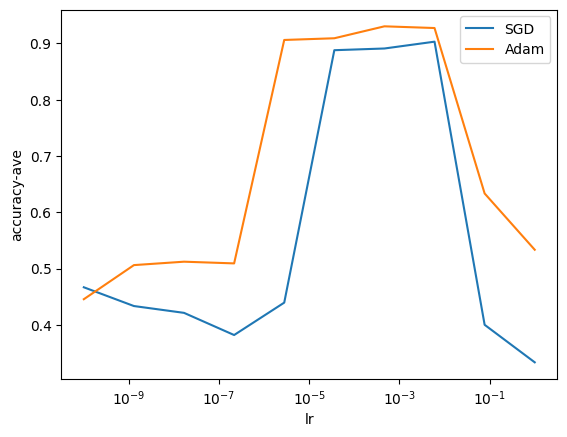

In [145]:
plt.plot(lr_list, ac_num_list_s,label='SGD')
plt.plot(lr_list, ac_num_list_a,label='Adam')
plt.xlabel('lr')
plt.ylabel('accuracy-ave')
plt.xscale('log')
plt.legend()
plt.show()

したがって，Adamを用いて学習率を以下のように設定してみる．

ちなみに，学習率が小さすぎると学習が進んでいないことから正解率が低いことが見れる．

$$
lr＝0.001
$$

In [149]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(500):
  total_loss = 0 #(1)
  for train_x, train_y in train_loader: #(2)
    optimizer.zero_grad() #(3)
    output = model(train_x) #(4)
    loss = criterion(output, train_y) #(5)
    loss.backward() #(6)
    optimizer.step() #(7)
    total_loss += loss.data #(8)
test_model = model(test_X).detach()
# test_model
torch.max(test_model, 1)
result = torch.max(test_model, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy

0.9696969696969697

### 惜しい！！！

（似たような課題回答があるかもしれないが，私が友人から学んだため，先駆者は友人である）